# Part 1: Machine Learning Models
You work for an office transport company. You are in discussions with ABC Consulting company for
providing transport for their employees. For this purpose, you are tasked with understanding how do the
employees of ABC Consulting prefer to commute presently (between home and office). Based on the
parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’, you are required to
predict the preferred mode of transport. The project requires you to build several Machine Learning
models and compare them so that the model can be finalised.

# Data Dictionary
## Age : Age of the Employee in Years
## Gender : Gender of the Employee
## Engineer : For Engineer =1 , Non Engineer =0
## MBA : For MBA =1 , Non MBA =0
## Work Exp : Experience in years
## Salary : Salary in Lakhs per Annum
## Distance : Distance in Kms from Home to Office
## license : If Employee has Driving Licence -1, If not, then 0
## Transport : Mode of Transport

In [909]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Reading the Dataset

In [910]:
df=pd.read_csv("Cars (2) (1).csv")

In [911]:
# Checking the data

In [912]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [913]:
df.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


In [914]:
print("The number of rows is",df.shape[0],"\nThe number of columns is", df.shape[1])

The number of rows is 444 
The number of columns is 9


# Information of the Dataset

In [915]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


# 5 Point Summary

In [916]:
df.describe()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,27.747748,0.754505,0.252252,6.299550,16.238739,11.323198,0.234234
std,4.416710,0.430866,0.434795,5.112098,10.453851,3.606149,0.423997
min,18.000000,0.000000,0.000000,0.000000,6.500000,3.200000,0.000000
25%,25.000000,1.000000,0.000000,3.000000,9.800000,8.800000,0.000000
50%,27.000000,1.000000,0.000000,5.000000,13.600000,11.000000,0.000000
75%,30.000000,1.000000,1.000000,8.000000,15.725000,13.425000,0.000000
max,43.000000,1.000000,1.000000,24.000000,57.000000,23.400000,1.000000


# Duplicate Data

In [917]:
dups=df.duplicated()
print ("The number of duplicate rows = %d" %(dups.sum()))

df[dups]

The number of duplicate rows = 0


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport


# Null Values

In [918]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

# Outliers 

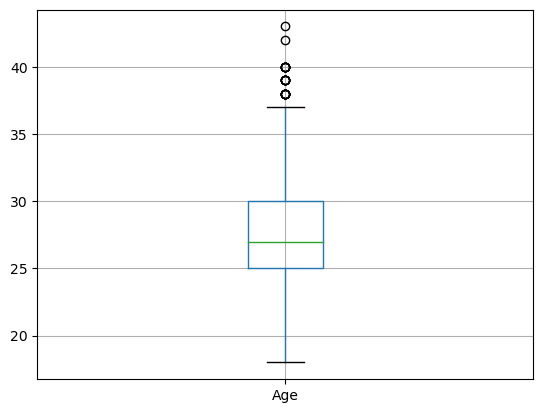

In [919]:
df.boxplot(column=['Age'])
plt.show()

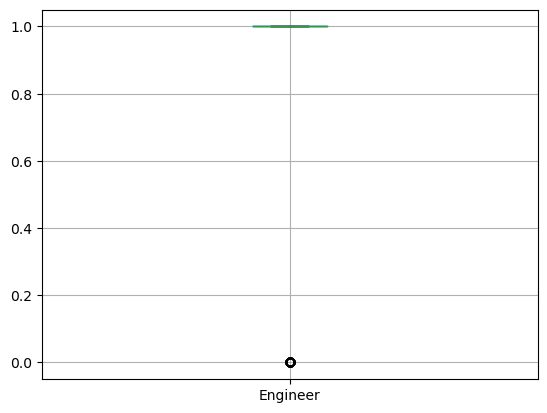

In [920]:
df.boxplot(column=['Engineer'])
plt.show()

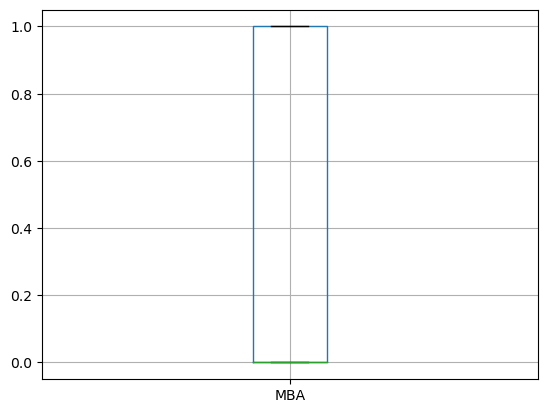

In [921]:
df.boxplot(column=['MBA'])
plt.show()

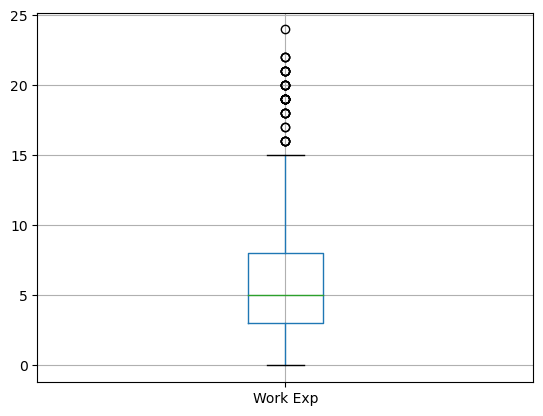

In [922]:
df.boxplot(column=['Work Exp'])
plt.show()

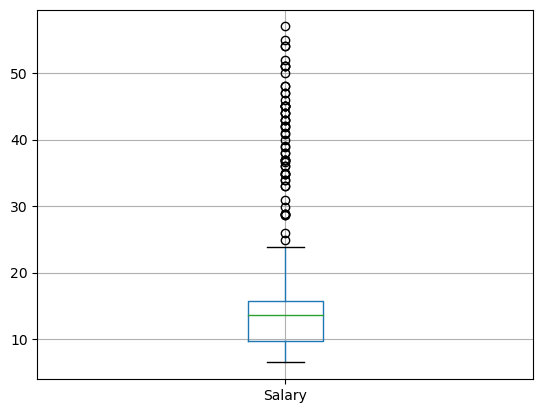

In [923]:
df.boxplot(column=['Salary'])
plt.show()

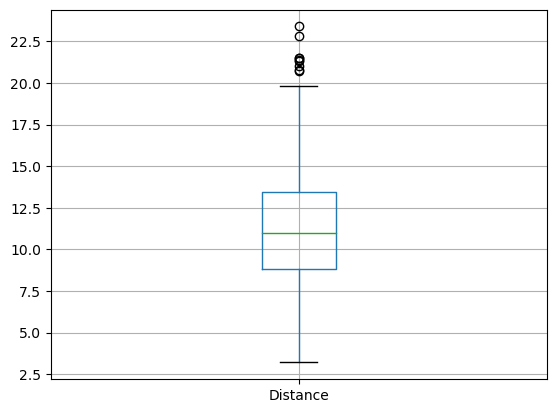

In [924]:
df.boxplot(column=['Distance'])
plt.show()

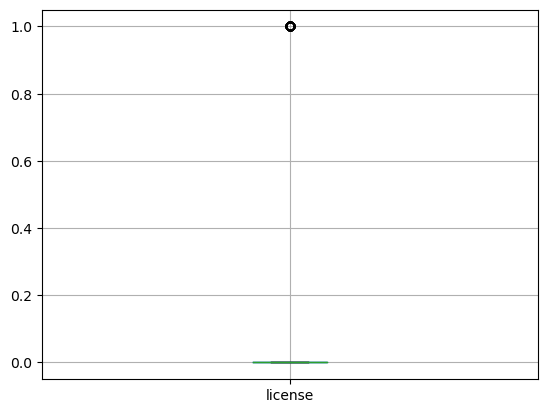

In [925]:
df.boxplot(column=['license'])
plt.show()

In [926]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [927]:
# Remove outliers for 'Age' column
lrAge, urAge = remove_outlier(df['Age'])
df['Age'] = np.where(df['Age'] > urAge, urAge, df['Age'])
df['Age'] = np.where(df['Age'] < lrAge, lrAge, df['Age'])

# Remove outliers for 'Work Exp' column
lrWorkExp, urWorkExp = remove_outlier(df['Work Exp'])
df['Work Exp'] = np.where(df['Work Exp'] > urWorkExp, urWorkExp, df['Work Exp'])
df['Work Exp'] = np.where(df['Work Exp'] < lrWorkExp, lrWorkExp, df['Work Exp'])

# Remove outliers for 'Salary' column
lrSalary, urSalary = remove_outlier(df['Salary'])
df['Salary'] = np.where(df['Salary'] > urSalary, urSalary, df['Salary'])
df['Salary'] = np.where(df['Salary'] < lrSalary, lrSalary, df['Salary'])

# Remove outliers for 'Distance' column
lrDistance, urDistance = remove_outlier(df['Distance'])
df['Distance'] = np.where(df['Distance'] > urDistance, urDistance, df['Distance'])
df['Distance'] = np.where(df['Distance'] < lrDistance, lrDistance, df['Distance'])

# Check the shape of the DataFrame after removing outliers
print(df.shape)

(444, 9)


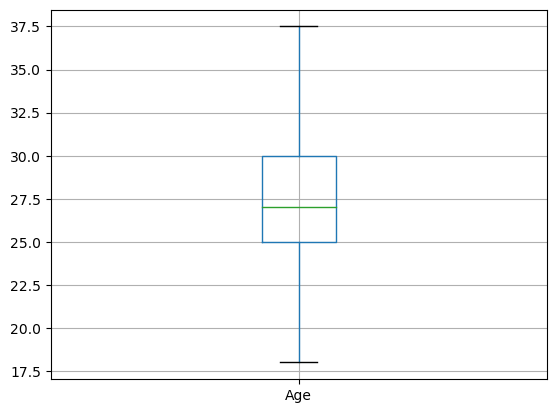

In [928]:
df.boxplot(column=['Age'])
plt.show()

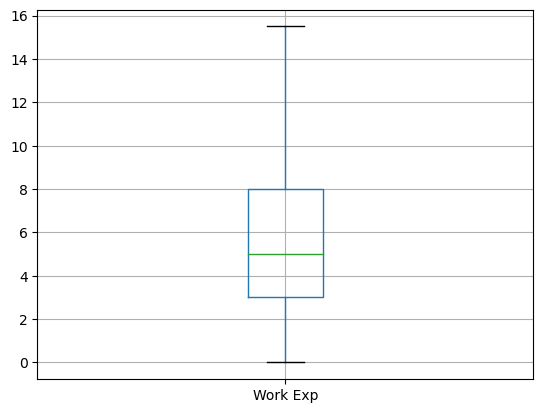

In [929]:
df.boxplot(column=['Work Exp'])
plt.show()

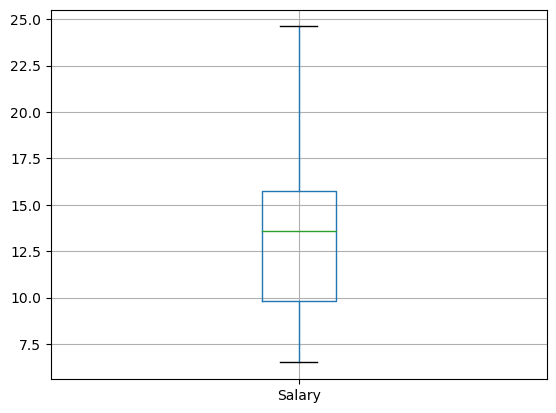

In [930]:
df.boxplot(column=['Salary'])
plt.show()

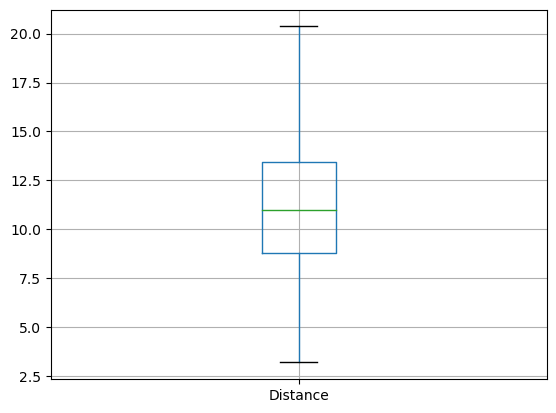

In [931]:
df.boxplot(column=['Distance'])
plt.show()

# Data Visualization

# Univariate Analysis 

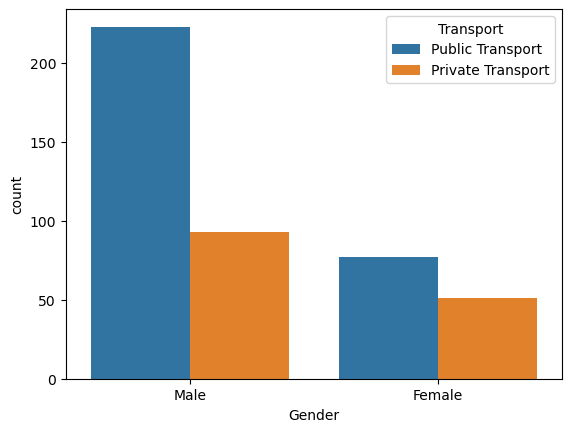

In [932]:
sns.countplot(x ='Gender', hue='Transport',data = df)
plt.show()

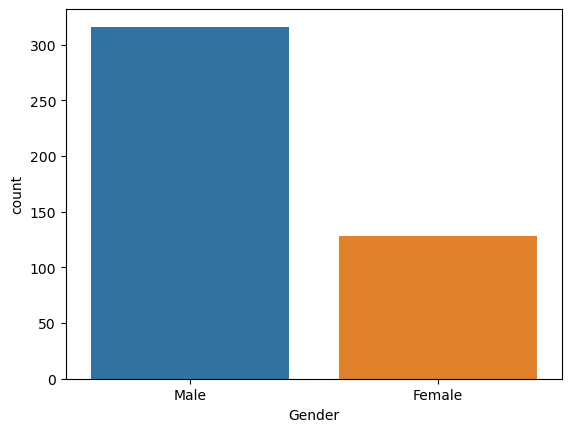

In [933]:
sns.countplot(x ='Gender',data = df)
plt.show()

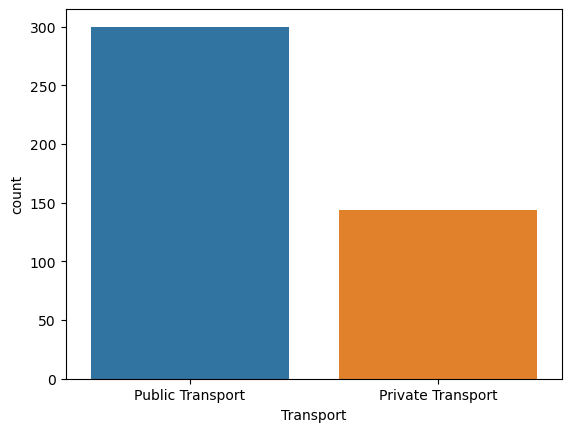

In [934]:
sns.countplot(x ='Transport',data = df)
plt.show()

# Bivariate Analysis

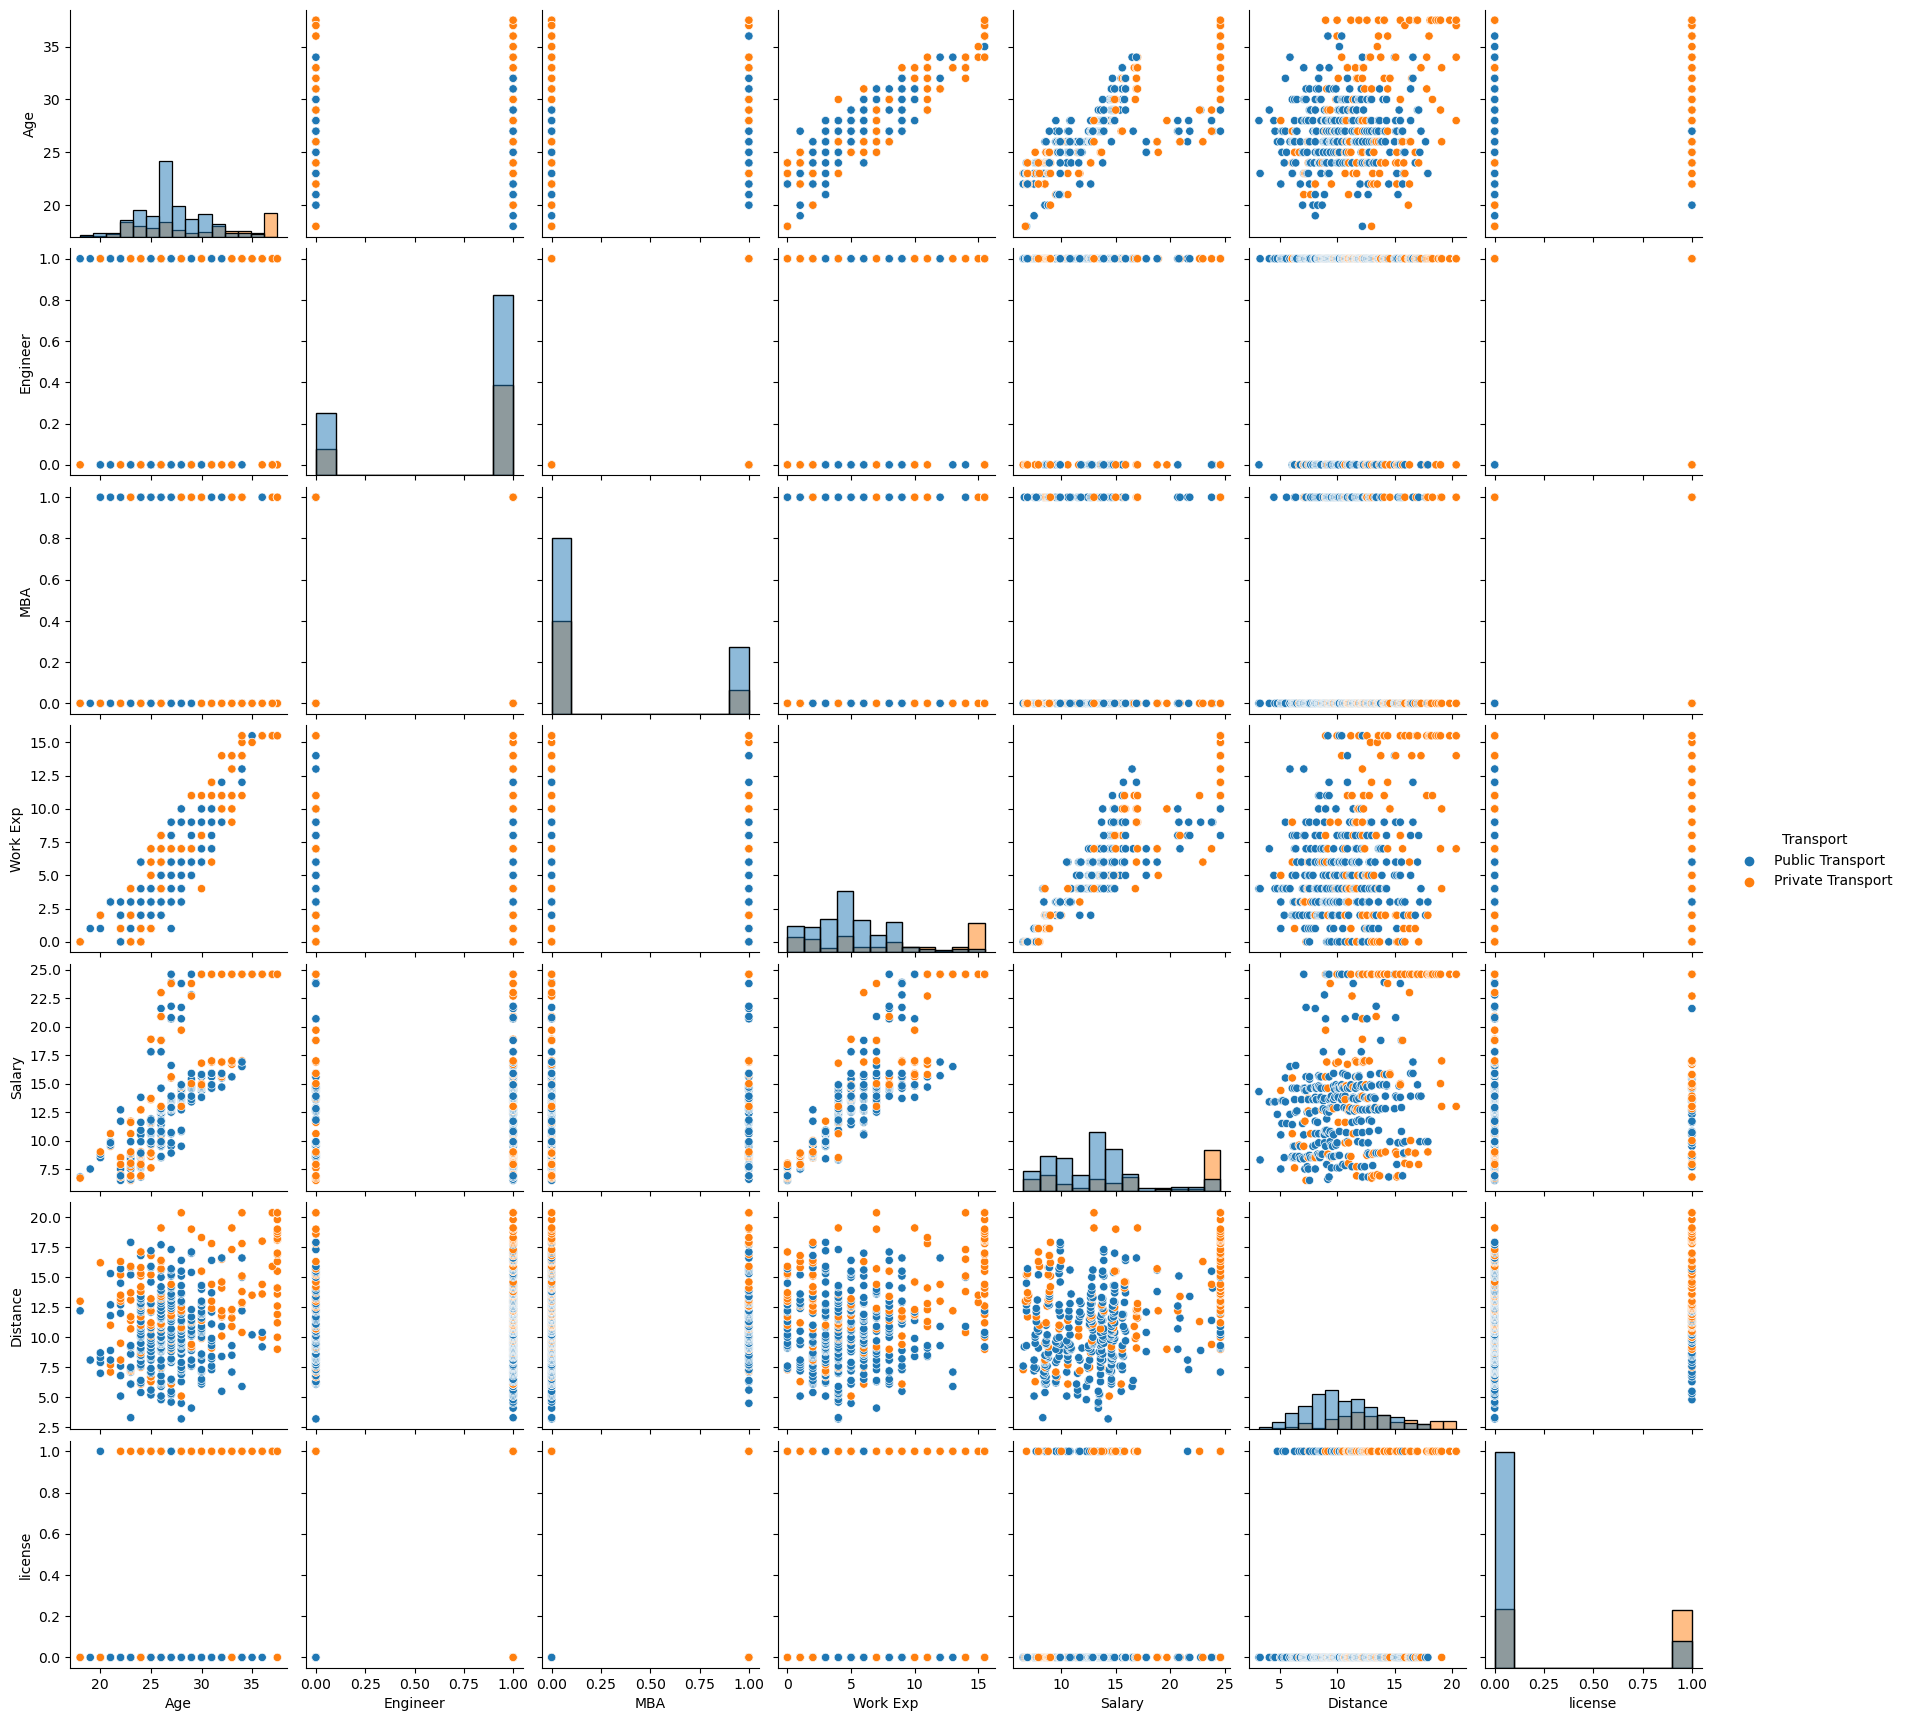

In [935]:
# Pairplot using sns
sns.pairplot(df ,diag_kind='hist' ,hue='Transport');

In [936]:
correlation_matrix = df.corr(numeric_only=True)

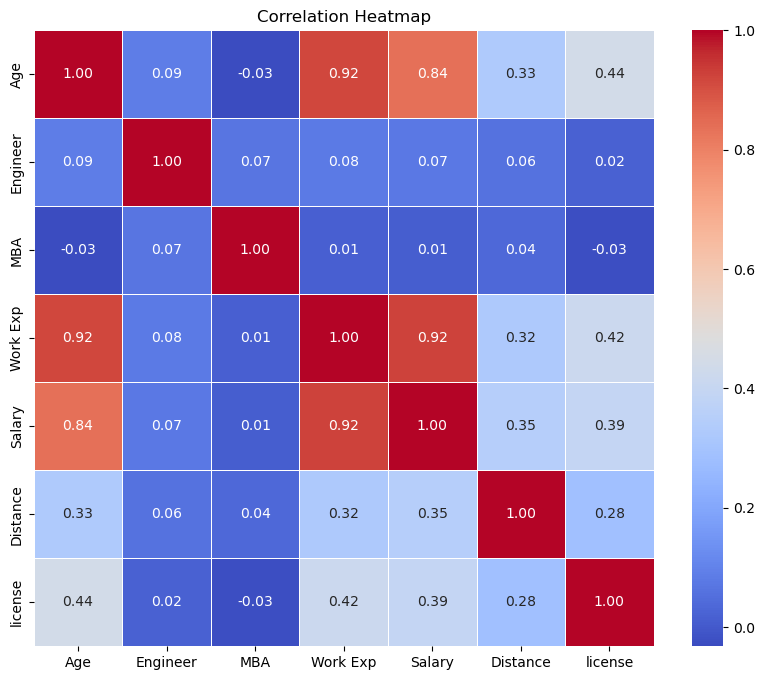

In [937]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

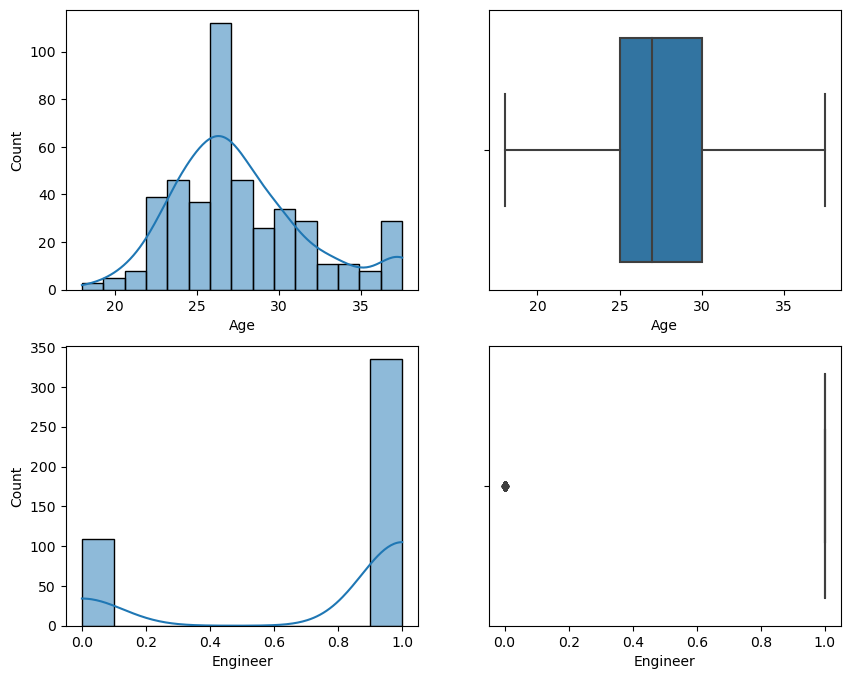

In [938]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 8)

# Specify the number of bins manually
sns.histplot(df['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df, ax=axes[0][1])

# Plot histogram and boxplot for 'Average_Collection_Days'
sns.histplot(df['Engineer'], kde=True, ax=axes[1][0])
sns.boxplot(x='Engineer', data=df, ax=axes[1][1])

plt.show()

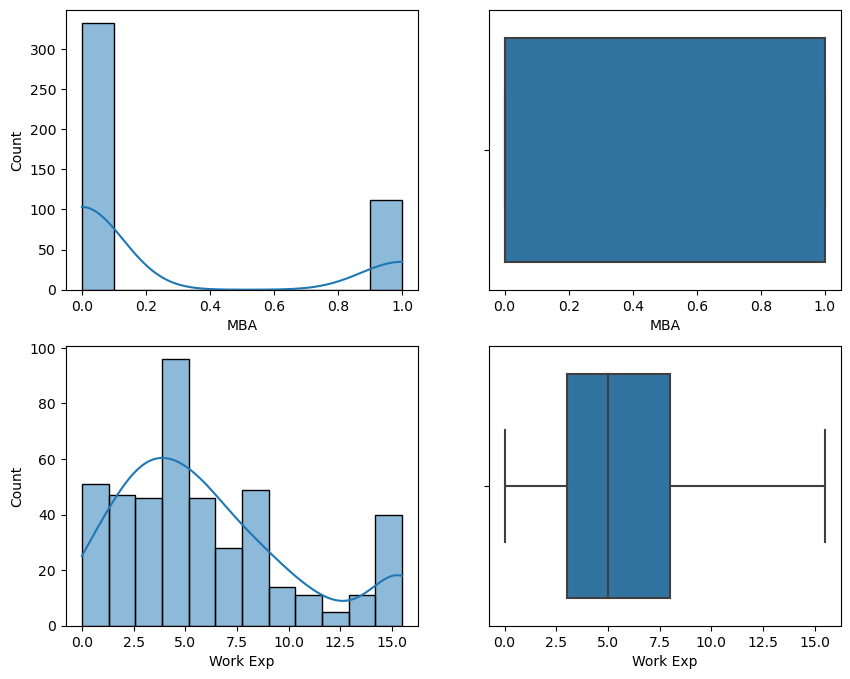

In [939]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 8)

# Specify the number of bins manually
sns.histplot(df['MBA'], kde=True, ax=axes[0][0])
sns.boxplot(x='MBA', data=df, ax=axes[0][1])

# Plot histogram and boxplot for 'Average_Collection_Days'
sns.histplot(df['Work Exp'], kde=True, ax=axes[1][0])
sns.boxplot(x='Work Exp', data=df, ax=axes[1][1])

plt.show()

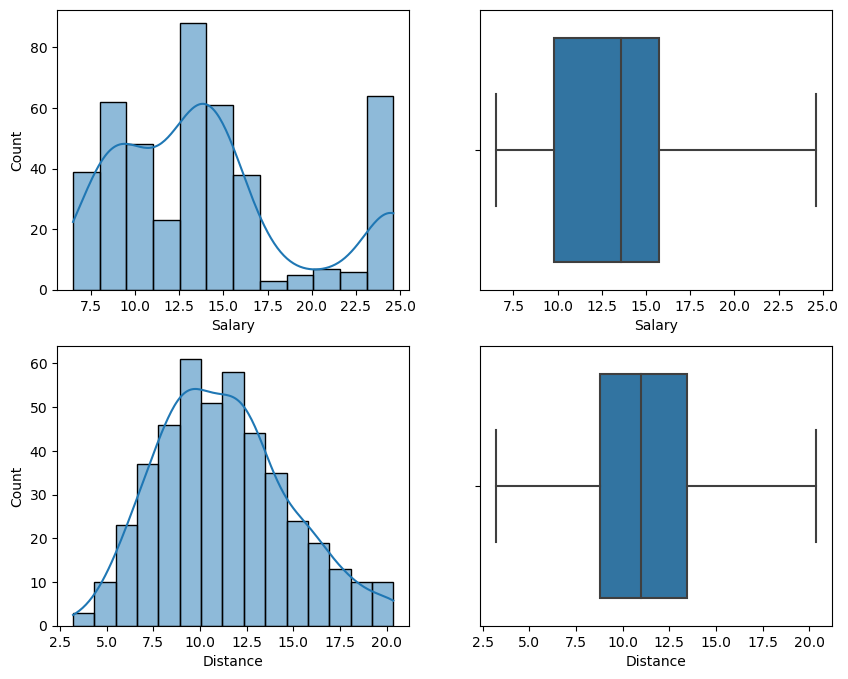

In [940]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 8)

# Specify the number of bins manually
sns.histplot(df['Salary'], kde=True, ax=axes[0][0])
sns.boxplot(x='Salary', data=df, ax=axes[0][1])

# Plot histogram and boxplot for 'Average_Collection_Days'
sns.histplot(df['Distance'], kde=True, ax=axes[1][0])
sns.boxplot(x='Distance', data=df, ax=axes[1][1])

plt.show()

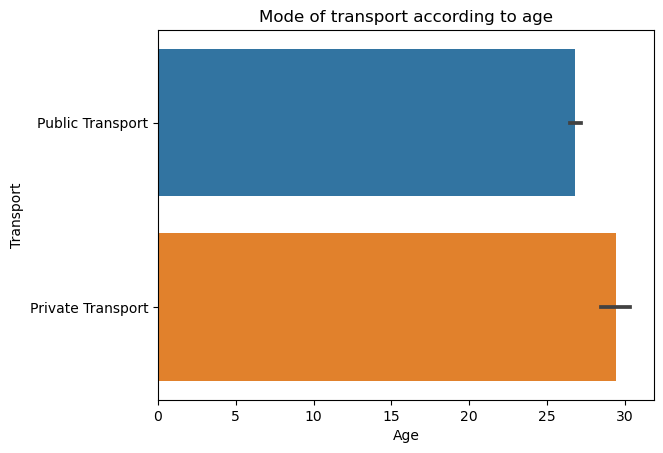

In [941]:
sns.barplot(x='Age', y='Transport', data=df)
plt.title('Mode of transport according to age')
plt.show()

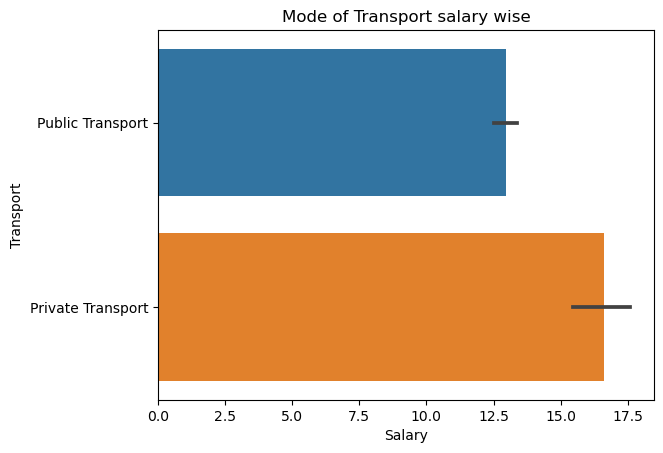

In [942]:
sns.barplot(x='Salary', y='Transport', data=df)
plt.title('Mode of Transport salary wise')
plt.show()

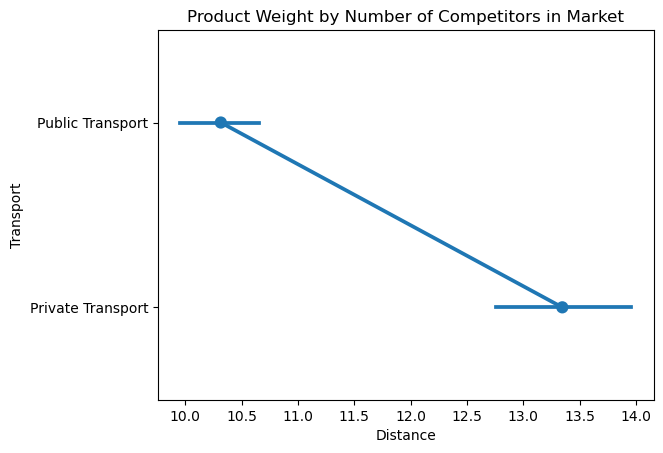

In [943]:
sns.pointplot(x='Distance', y='Transport', data=df)
plt.title('Product Weight by Number of Competitors in Market')
plt.show()

In [944]:
df['Gender'].value_counts()

Male      316
Female    128
Name: Gender, dtype: int64

In [945]:
df['Transport'].value_counts()

Public Transport     300
Private Transport    144
Name: Transport, dtype: int64

In [946]:
df['Age'].value_counts()

26.0    63
27.0    49
28.0    46
24.0    46
25.0    37
30.0    34
29.0    26
37.5    25
23.0    24
31.0    16
22.0    15
32.0    13
34.0    11
33.0    11
21.0     8
36.0     6
20.0     5
37.0     4
35.0     2
18.0     2
19.0     1
Name: Age, dtype: int64

In [947]:
df['Age'].value_counts()

26.0    63
27.0    49
28.0    46
24.0    46
25.0    37
30.0    34
29.0    26
37.5    25
23.0    24
31.0    16
22.0    15
32.0    13
34.0    11
33.0    11
21.0     8
36.0     6
20.0     5
37.0     4
35.0     2
18.0     2
19.0     1
Name: Age, dtype: int64

In [948]:
df.groupby(["Transport"]).count()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
Transport,,,,,,,,
Private Transport,144,144,144,144,144,144,144,144
Public Transport,300,300,300,300,300,300,300,300


# Scaling the data

In [949]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
df_scaled = df.copy()  # create a copy of the original dataframe
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])

# Now, df_scaled contains the standardized features

In [950]:
df_scaled.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,0.083578,Male,-1.753110,-0.580818,-0.459062,0.030061,-2.292795,-0.553066,Public Transport
1,-1.117345,Female,0.570415,-0.580818,-0.459062,-1.098453,-2.264482,-0.553066,Public Transport
2,0.323762,Male,0.570415,-0.580818,0.235791,-0.139216,-2.037981,-0.553066,Public Transport
3,0.083578,Female,0.570415,1.721710,-0.227444,-0.139216,-1.924730,-0.553066,Public Transport
4,-0.156607,Male,0.570415,-0.580818,-0.459062,-0.139216,-1.896417,-0.553066,Public Transport


# Encoding

In [951]:
## We are coding up the  variables in an ordinal manner

df_scaled['Gender']=np.where(df_scaled['Gender'] =='Male', '0', df_scaled['Gender'])
df_scaled['Gender']=np.where(df_scaled['Gender'] =='Female', '1', df_scaled['Gender'])
df_scaled['Transport']=np.where(df_scaled['Transport'] =='Public Transport', '0', df_scaled['Transport'])
df_scaled['Transport']=np.where(df_scaled['Transport'] =='Private Transport', '1', df_scaled['Transport'])


In [952]:
import numpy as np

# Convert 'Gender' column to int64
df_scaled['Gender'] = df_scaled['Gender'].astype(np.int64)

# Convert 'Transport' column to int64
df_scaled['Transport'] = df_scaled['Transport'].astype(np.int64)


# Train Test Split

In [953]:
# Copy all the predictor variables into X dataframe
X = df_scaled.drop('Transport', axis=1)

# Copy target into the y dataframe. 
y = df_scaled['Transport']

In [954]:
from sklearn.model_selection import train_test_split

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=df_scaled['Transport'])

In [955]:
y_train.value_counts(1)

0    0.674194
1    0.325806
Name: Transport, dtype: float64

In [956]:
y_test.value_counts(1)

0    0.679104
1    0.320896
Name: Transport, dtype: float64

In [957]:
X_test.shape

(134, 8)

In [958]:
X_train.shape

(310, 8)

# Logistic Regression Model

In [959]:
from sklearn.linear_model import LogisticRegression

# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg', max_iter=10000, penalty=None, verbose=True, n_jobs=2)
model.fit(X_train, y_train)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty=None, solver='newton-cg',
                   verbose=True)

# Predicting on Training and Test dataset

In [960]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

# Getting the Predicted Classes and Probs

In [961]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.049834,0.950166
1,0.629713,0.370287
2,0.571672,0.428328
3,0.758348,0.241652
4,0.912209,0.087791


# Model Evaluation

In [962]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.7903225806451613

# AUC and ROC for the training data

In [963]:
# predict probabilities for the training set
probs_train = model.predict_proba(X_train)[:, 1]



In [964]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC for training set
roc_auc_train = roc_auc_score(y_train_int, probs_train)
print("ROC AUC for Training Set:", roc_auc_train)


ROC AUC for Training Set: 0.8045383485716994


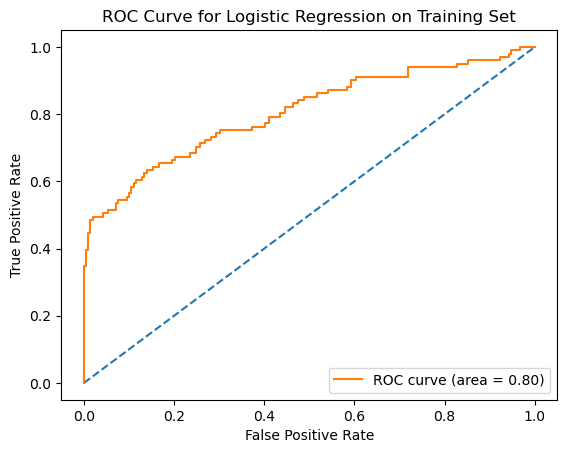

In [965]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for training set
train_fpr, train_tpr, _ = roc_curve(y_train_int, probs_train)

# Calculate ROC AUC for training set
roc_auc_train = auc(train_fpr, train_tpr)

# Plot ROC curve for training set
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression on Training Set')
plt.legend(loc="lower right")
plt.show()


In [966]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC for training set
roc_auc_test = roc_auc_score(y_test_int, probs_test)
print("ROC AUC for Test Set:", roc_auc_test)


ROC AUC for Test Set: 0.853309481216458


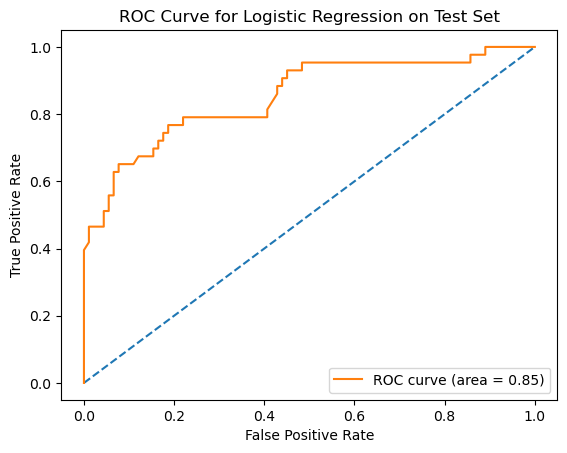

In [967]:
from sklearn.metrics import roc_curve, auc

# Convert string labels to integers for test set if necessary
y_test_int = y_test.astype(int)

# Calculate ROC curve for test set
test_fpr, test_tpr, _ = roc_curve(y_test_int, probs_test)

# Calculate ROC AUC for test set
roc_auc_test = auc(test_fpr, test_tpr)

# Plot ROC curve for test set
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression on Test Set')
plt.legend(loc="lower right")
plt.show()


In [968]:
# Accuracy - Test Data
model.score(X_test, y_test)


0.835820895522388

In [969]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, ytrain_predict)

array([[189,  20],
       [ 45,  56]], dtype=int64)

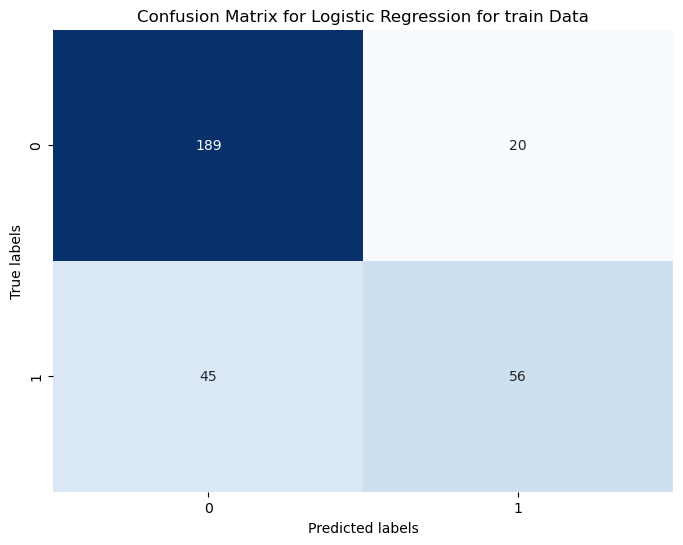

In [970]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is your trained classifier and 'y_train_predict' is the predicted labels
y_train_predict = model.predict(X_train)

# Calculate confusion matrix
cm = confusion_matrix(y_train, y_train_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression for train Data')
plt.show()


In [971]:
from sklearn.metrics import classification_report

# Assuming 'model' is your trained classifier and 'y_train_predict' is the predicted labels
y_train_predict = model.predict(X_train)

# Generate classification report
report = classification_report(y_train, y_train_predict)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       209
           1       0.74      0.55      0.63       101

    accuracy                           0.79       310
   macro avg       0.77      0.73      0.74       310
weighted avg       0.78      0.79      0.78       310



# Confusion Matrix for test data

In [972]:
confusion_matrix(y_test, ytest_predict)

array([[85,  6],
       [16, 27]], dtype=int64)

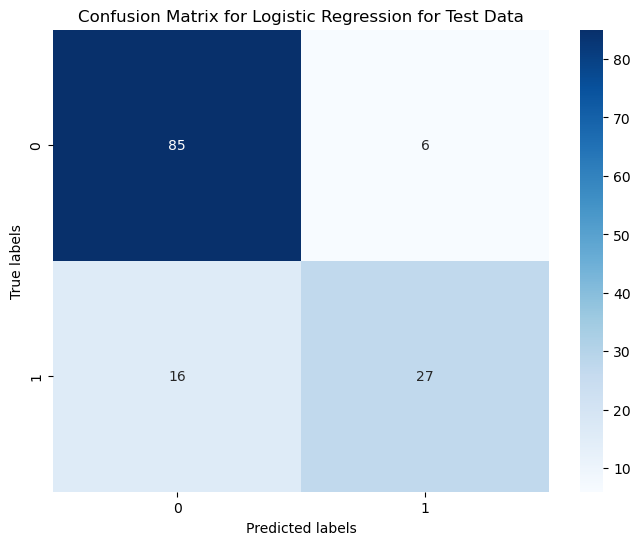

In [973]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is your trained classifier and 'X_test' and 'y_test' are your test data
y_pred = model.predict(X_test)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression for Test Data')
plt.show()

In [974]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        91
           1       0.82      0.63      0.71        43

    accuracy                           0.84       134
   macro avg       0.83      0.78      0.80       134
weighted avg       0.83      0.84      0.83       134



# LDA Model

In [975]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Build LDA Model
clf = LinearDiscriminantAnalysis()
model = clf.fit(X_train, y_train)


# Prediction

In [976]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

# Training Data and Test Data Confusion Matrix Comparison

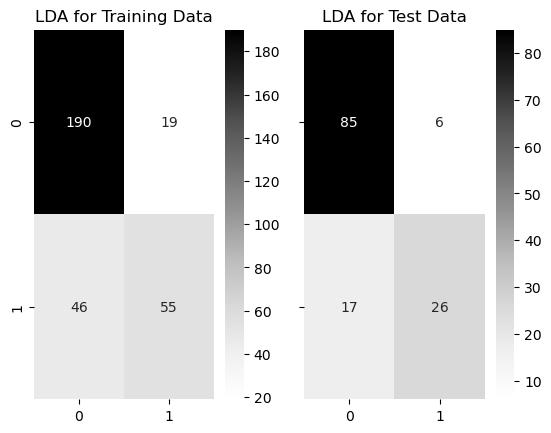

In [977]:
import seaborn as sns
from sklearn import metrics

# Your code for creating subplots and plotting confusion matrices

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LDA for Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA for Test Data');

# Training Data and Test Data Classification Report Comparison

In [978]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.81      0.91      0.85       209
           1       0.74      0.54      0.63       101

    accuracy                           0.79       310
   macro avg       0.77      0.73      0.74       310
weighted avg       0.78      0.79      0.78       310
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.83      0.93      0.88        91
           1       0.81      0.60      0.69        43

    accuracy                           0.83       134
   macro avg       0.82      0.77      0.79       134
weighted avg       0.83      0.83      0.82       134
 



# Probability prediction for the training and test data

In [979]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

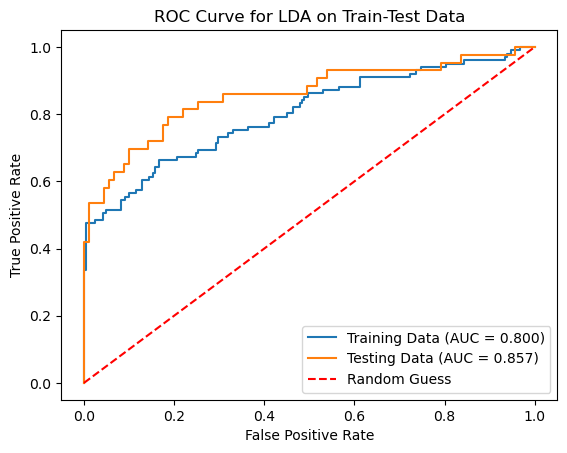

In [980]:
from sklearn.metrics import roc_auc_score, roc_curve

# Convert string labels to integers
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

# Calculate AUC and ROC curve for the training data
auc_train = roc_auc_score(y_train_int, pred_prob_train[:, 1])
fpr_train, tpr_train, _ = roc_curve(y_train_int, pred_prob_train[:, 1])

# Plot ROC curve for the training data
plt.plot(fpr_train, tpr_train, label='Training Data (AUC = {:.3f})'.format(auc_train))

# Calculate AUC and ROC curve for the testing data
auc_test = roc_auc_score(y_test_int, pred_prob_test[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test_int, pred_prob_test[:, 1])

# Plot ROC curve for the testing data
plt.plot(fpr_test, tpr_test, label='Testing Data (AUC = {:.3f})'.format(auc_test))

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA on Train-Test Data')
plt.legend()
plt.show()


In [981]:
pred_prob_train[:,1]

array([0.03569967, 0.78529233, 0.73431363, 0.24134653, 0.17739436,
       0.2522199 , 0.66788694, 0.06761733, 0.11616053, 0.14493775,
       0.08460048, 0.04201418, 0.7864251 , 0.11281249, 0.15624759,
       0.80652987, 0.25185728, 0.05276125, 0.50868575, 0.94596606,
       0.13481213, 0.20640702, 0.20713683, 0.06445053, 0.92376566,
       0.10111779, 0.06999132, 0.15314706, 0.02806724, 0.46971421,
       0.07646544, 0.19706593, 0.40082359, 0.05777621, 0.18489216,
       0.68191805, 0.46896766, 0.17421887, 0.45121272, 0.04735665,
       0.06901146, 0.06702539, 0.25178953, 0.03712318, 0.20605849,
       0.20388852, 0.93446787, 0.84321628, 0.13645138, 0.24997154,
       0.95937058, 0.64527409, 0.05026445, 0.72933646, 0.09391301,
       0.45468776, 0.26520817, 0.52447672, 0.56662228, 0.21978992,
       0.09907852, 0.34418749, 0.74412234, 0.26513051, 0.0377256 ,
       0.80079895, 0.29756721, 0.19312779, 0.29780425, 0.41498684,
       0.05185854, 0.10727559, 0.57053453, 0.10130996, 0.27185

In [982]:
#intercept value
clf.intercept_ 

array([-1.38890105])

In [983]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.46720653,  1.22981957,  0.05049306, -0.31230912,  0.68745605,
         0.04941061,  0.77558601,  1.01891133]])

In [984]:
X.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license'],
      dtype='object')

In [985]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.47,  1.23,  0.05, -0.31,  0.69,  0.05,  0.78,  1.02]])

In [986]:
lda_model = LinearDiscriminantAnalysis(n_components = 1)# as only two classes are there for prediction thus 2-1=1 component
X_train_lda = lda_model.fit_transform(X_train, y_train)
X_test_lda = lda_model.transform(X_test)


In [987]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (310, 8)
X_test (134, 8)
y_train (310,)
y_test (134,)


# Building a Decision Tree Classifier

In [988]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', random_state=1)

In [989]:
# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [990]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [991]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

               Imp
Age       0.283513
Distance  0.269584
Salary    0.151225
Work Exp  0.097802
license   0.066007
MBA       0.060133
Engineer  0.041201
Gender    0.030536


In [992]:
y_predict = dt_model.predict(X_test)

In [993]:
y_predict.shape

(134,)

# Regularising the Decision Tree

# Adding Tuning Parameters

In [994]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, 0.01, 0.001],
    'max_depth': [1, 5, 10, 15, 20],
    'min_samples_leaf': [1, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy']
}

tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 450 candidates, totalling 2250 fits


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
750 fits failed out of a total of 2250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\Lib\site-packages\s

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [995]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=5,
                       max_features='sqrt', min_samples_leaf=5,
                       random_state=1024)

In [996]:
from sklearn.tree import DecisionTreeClassifier

reg_dt_model = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=5,
                                      max_features='sqrt', min_samples_leaf=5, random_state=1024)
reg_dt_model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=5,
                       max_features='sqrt', min_samples_leaf=5,
                       random_state=1024)

# Generating New Tree

In [997]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [998]:
# Variable Importance

In [999]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

               Imp
license   0.287806
Salary    0.278500
Distance  0.251304
Work Exp  0.102455
Age       0.037748
MBA       0.023323
Gender    0.018865
Engineer  0.000000


# Predicting on Training and Test dataset

In [1000]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [1001]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (310,)
ytest_predict (134,)


# Getting the Predicted Classes

In [1002]:
ytest_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

# Getting the Predicted Probabilities

In [1003]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.        , 1.        ],
       [0.87378641, 0.12621359],
       [0.6       , 0.4       ],
       [0.87378641, 0.12621359],
       [1.        , 0.        ],
       [0.5625    , 0.4375    ],
       [1.        , 0.        ],
       [0.87378641, 0.12621359],
       [0.87378641, 0.12621359],
       [0.87378641, 0.12621359],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.87378641, 0.12621359],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.87378641, 0.12621359],
       [0.76923077, 0.23076923],
       [1.        , 0.        ],
       [0.5625    , 0.4375    ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.76923077, 0.23076923],
       [0.87378641, 0.12621359],
       [0.76923077, 0.23076923],
       [1.        , 0.        ],
       [0.87378641, 0.12621359],
       [0.33333333, 0.66666667],
       [0.87378641, 0.12621359],
       [0.

In [1004]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.000000,1.000000
1,0.873786,0.126214
2,0.600000,0.400000
3,0.873786,0.126214
4,1.000000,0.000000


# Measuring AUC-ROC Curve

In [1005]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train
encoded_y_train = label_encoder.fit_transform(y_train)

# Now, encoded_y_train contains binary labels suitable for roc_curve
fpr, tpr, thresholds = roc_curve(encoded_y_train, probs)


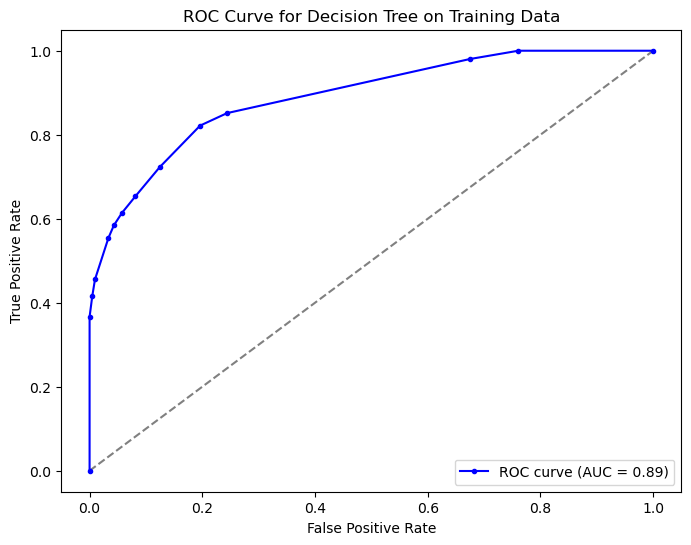

In [1006]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train
encoded_y_train = label_encoder.fit_transform(y_train)

# Predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# Keep probabilities for the positive outcome only
probs = probs[:, 1]
# Calculate AUC
auc = roc_auc_score(encoded_y_train, probs)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(encoded_y_train, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.plot(fpr, tpr, marker='.', color='blue', label='ROC curve (AUC = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree on Training Data')
plt.legend(loc='lower right')
plt.show()



AUC for the Test Data: 0.766


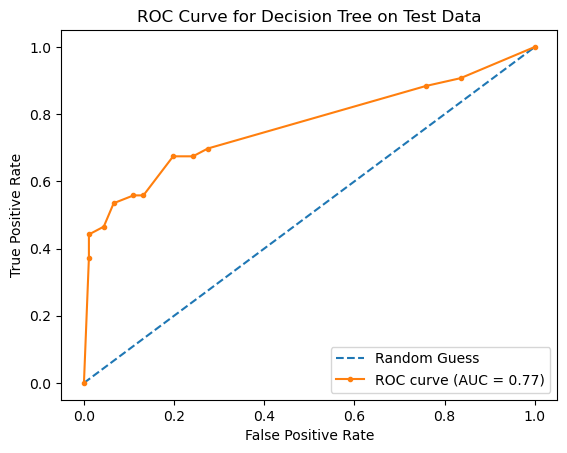

In [1007]:
# Predict probabilities for the test data
probs_test = reg_dt_model.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# Calculate AUC for the test data
auc_test = roc_auc_score(encoded_y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)
# Calculate ROC curve for the test data
fpr_test, tpr_test, thresholds_test = roc_curve(encoded_y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
# Plot the ROC curve for the test data
plt.plot(fpr_test, tpr_test, marker='.', label='ROC curve (AUC = %0.2f)' % auc_test)
# Show the plot
plt.title('ROC Curve for Decision Tree on Test Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [1008]:
# Confusin Matrix

In [1009]:
from sklearn.metrics import classification_report,confusion_matrix

In [1010]:
confusion_matrix(y_train, ytrain_predict)

array([[200,   9],
       [ 42,  59]], dtype=int64)

In [1011]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train) 

0.8354838709677419

In [1012]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       209
           1       0.87      0.58      0.70       101

    accuracy                           0.84       310
   macro avg       0.85      0.77      0.79       310
weighted avg       0.84      0.84      0.83       310



In [1013]:
# Confusion Matrix for test data

In [1014]:
confusion_matrix(y_test, ytest_predict)

array([[85,  6],
       [20, 23]], dtype=int64)

In [1015]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8059701492537313

In [1016]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        91
           1       0.79      0.53      0.64        43

    accuracy                           0.81       134
   macro avg       0.80      0.73      0.75       134
weighted avg       0.80      0.81      0.79       134



# Gaussian Naive Bayes

In [1017]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [1018]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [1019]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.7935483870967742
[[191  18]
 [ 46  55]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       209
           1       0.75      0.54      0.63       101

    accuracy                           0.79       310
   macro avg       0.78      0.73      0.74       310
weighted avg       0.79      0.79      0.78       310



In [1020]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.7985074626865671
[[83  8]
 [19 24]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        91
           1       0.75      0.56      0.64        43

    accuracy                           0.80       134
   macro avg       0.78      0.74      0.75       134
weighted avg       0.79      0.80      0.79       134



In [1021]:
NB_model.score(X_train, y_train)

0.7935483870967742

In [1022]:
NB_model.score(X_test, y_test)

0.7985074626865671

# KNN Model

In [1023]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [1024]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8354838709677419
[[197  12]
 [ 39  62]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.89       209
           1       0.84      0.61      0.71       101

    accuracy                           0.84       310
   macro avg       0.84      0.78      0.80       310
weighted avg       0.84      0.84      0.83       310



In [1025]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.835820895522388
[[86  5]
 [17 26]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        91
           1       0.84      0.60      0.70        43

    accuracy                           0.84       134
   macro avg       0.84      0.77      0.79       134
weighted avg       0.84      0.84      0.83       134



In [1026]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [1027]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8225806451612904
[[198  11]
 [ 44  57]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       209
           1       0.84      0.56      0.67       101

    accuracy                           0.82       310
   macro avg       0.83      0.76      0.78       310
weighted avg       0.82      0.82      0.81       310



In [1028]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8432835820895522
[[88  3]
 [18 25]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        91
           1       0.89      0.58      0.70        43

    accuracy                           0.84       134
   macro avg       0.86      0.77      0.80       134
weighted avg       0.85      0.84      0.83       134



In [1029]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22388059701492535,
 0.16417910447761197,
 0.16417910447761197,
 0.15671641791044777,
 0.15671641791044777,
 0.17910447761194026,
 0.17910447761194026,
 0.17910447761194026,
 0.17910447761194026,
 0.17910447761194026]

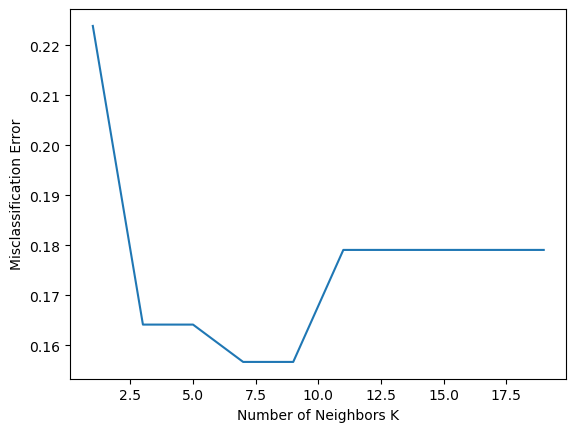

In [1030]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [1031]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [1032]:

## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8129032258064516
[[201   8]
 [ 50  51]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       209
           1       0.86      0.50      0.64       101

    accuracy                           0.81       310
   macro avg       0.83      0.73      0.76       310
weighted avg       0.82      0.81      0.80       310



In [1033]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8208955223880597
[[88  3]
 [21 22]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        91
           1       0.88      0.51      0.65        43

    accuracy                           0.82       134
   macro avg       0.84      0.74      0.76       134
weighted avg       0.83      0.82      0.81       134



# Random Forest

In [1034]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [1035]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))

1.0
[[209   0]
 [  0 101]]


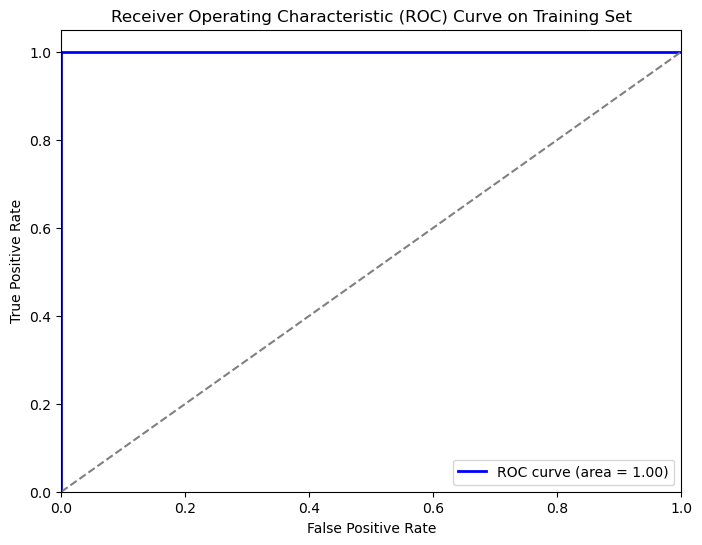

In [1036]:
from sklearn.metrics import roc_curve, auc

# Obtain predicted probabilities for the positive class
probs_train = RF_model.predict_proba(X_train)[:, 1]

# Calculate ROC curve for training set
fpr, tpr, thresholds = roc_curve(y_train, probs_train)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Training Set')
plt.legend(loc="lower right")
plt.show()


In [1037]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8731343283582089
[[87  4]
 [13 30]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        91
           1       0.88      0.70      0.78        43

    accuracy                           0.87       134
   macro avg       0.88      0.83      0.85       134
weighted avg       0.87      0.87      0.87       134



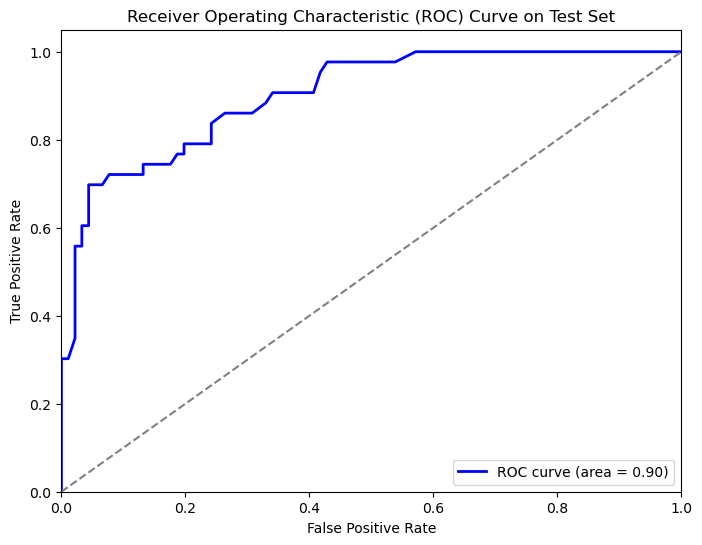

In [1038]:
from sklearn.metrics import roc_curve, auc

# Obtain predicted probabilities for the positive class
probs_test = RF_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, probs_test)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Test Set')
plt.legend(loc="lower right")
plt.show()


Train Accuracy: 0.9354838709677419
Test Accuracy: 0.8656716417910447


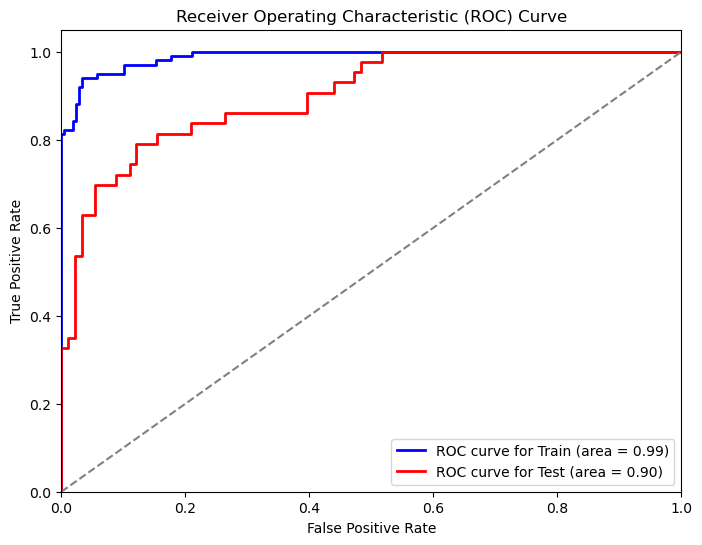

In [1039]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with adjusted hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the model on the training set
train_accuracy = rf_model.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)

# Evaluate the model on the test set
test_accuracy = rf_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Obtain predicted probabilities for the positive class
probs_train = rf_model.predict_proba(X_train)[:, 1]

# Calculate ROC curve for training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, probs_train)

# Calculate AUC for training set
roc_auc_train = auc(fpr_train, tpr_train)

# Obtain predicted probabilities for the positive class
probs_test = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)

# Calculate AUC for test set
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves for both training and test sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve for Train (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve for Test (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Bagging

In [1040]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [1041]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[209   0]
 [  0 101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       101

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [1042]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))


0.8582089552238806
[[84  7]
 [12 31]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        91
           1       0.82      0.72      0.77        43

    accuracy                           0.86       134
   macro avg       0.85      0.82      0.83       134
weighted avg       0.86      0.86      0.86       134



# Ensemble Learning - GradientBoost

In [1043]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8283582089552238


<Axes: >

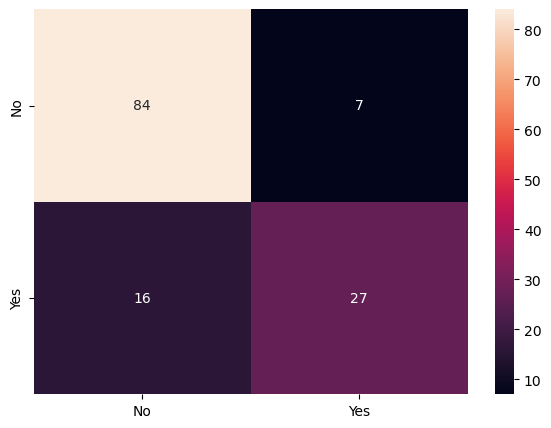

In [1044]:
y_predict = gbcl.predict(X_test)
y_predict = y_predict.astype(int)
print(gbcl.score(X_test, y_test))
cm = metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index=["No", "Yes"], columns=["No", "Yes"])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt="g")


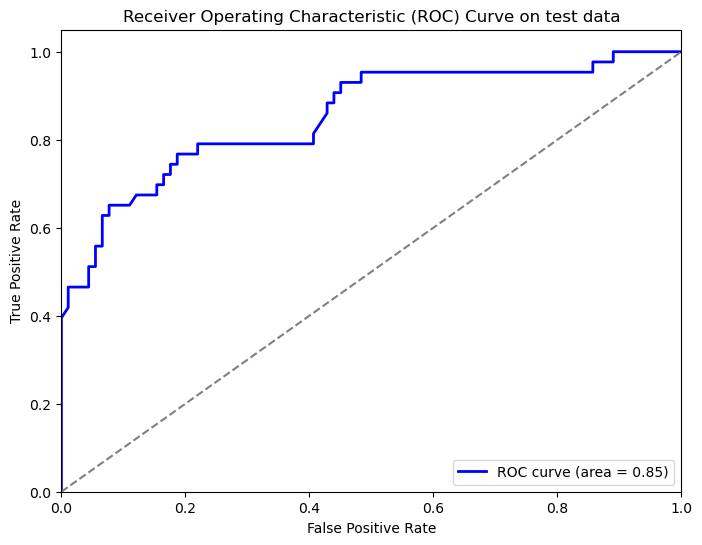

In [1045]:
# Obtain predicted probabilities for the positive class
probs_test = gbcl.predict_proba(X_test)[:, 1]

# Calculate ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, probs_test)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on test data')
plt.legend(loc="lower right")
plt.show()


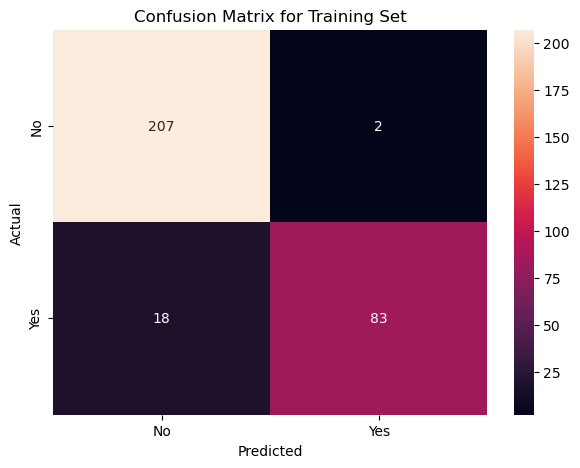

Accuracy for Training Set: 0.9354838709677419


In [1046]:
# Predict labels for the training set
y_train_predict = gbcl.predict(X_train)
y_train_predict = y_train_predict.astype(int)

# Compute the accuracy score for the training set
train_accuracy = gbcl.score(X_train, y_train)

# Compute the confusion matrix for the training set
train_cm = metrics.confusion_matrix(y_train, y_train_predict, labels=[0, 1])

# Create a DataFrame for the confusion matrix
df_train_cm = pd.DataFrame(train_cm, index=["No", "Yes"], columns=["No", "Yes"])

# Plot the confusion matrix for the training set
plt.figure(figsize=(7, 5))
sns.heatmap(df_train_cm, annot=True, fmt="g")
plt.title('Confusion Matrix for Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the accuracy score for the training set
print("Accuracy for Training Set:", train_accuracy)


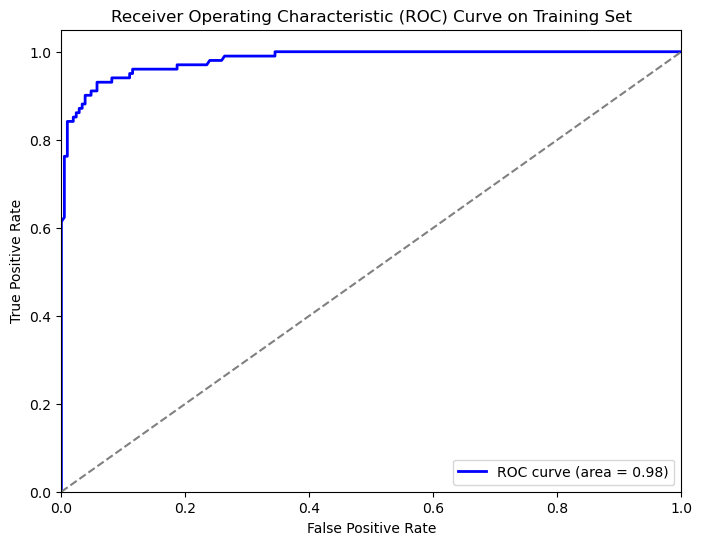

In [1047]:
# Obtain predicted probabilities for the positive class
probs_train = gbcl.predict_proba(X_train)[:, 1]

# Calculate ROC curve for training set
fpr, tpr, thresholds = roc_curve(y_train, probs_train)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Training Set')
plt.legend(loc="lower right")
plt.show()


Part 2: Text Mining
A dataset of Shark Tank episodes is made available. It contains 495 entrepreneurs making their pitch
to the VC sharks.
You will ONLY use “Description” column for the initial text mining exercise.
1. Pick out the Deal (Dependent Variable) and Description columns into a separate data frame.
2. Create two corpora, one with those who secured a Deal, the other with those who did not secure
a deal.
3. The following exercise is to be done for both the corpora:
a) Find the number of characters for both the corpuses.
b) Remove Stop Words from the corpora. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’,
‘even’ and ‘company’ are to be removed)
c) What were the top 3 most frequently occurring words in both corpuses (after removing
stop words)?
d) Plot the Word Cloud for both the corpora.
4. Refer to both the word clouds. What do you infer?
5. Looking at the word clouds, is it true that the entrepreneurs who introduced devices are less
likely to secure a deal based on your analysis?

In [1048]:
data=pd.read_csv("Shark Tank Companies (2).csv")

In [1049]:
data.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [1050]:
data.shape

(495, 19)

In [1051]:
data.isnull().sum()

deal                       0
description                0
episode                    0
category                   0
entrepreneurs             72
location                   0
website                   38
askedFor                   0
exchangeForStake           0
valuation                  0
season                     0
shark1                     0
shark2                     0
shark3                     0
shark4                     0
shark5                     0
title                      0
episode-season             0
Multiple Entreprenuers     0
dtype: int64

In [1052]:
data.dropna(subset=['entrepreneurs', 'website'], inplace=True)
data.isnull().sum()


deal                      0
description               0
episode                   0
category                  0
entrepreneurs             0
location                  0
website                   0
askedFor                  0
exchangeForStake          0
valuation                 0
season                    0
shark1                    0
shark2                    0
shark3                    0
shark4                    0
shark5                    0
title                     0
episode-season            0
Multiple Entreprenuers    0
dtype: int64

In [1053]:
df=data[['deal','description']]
print(df)

      deal                                        description
1     True  Retail and wholesale pie factory with two reta...
2     True  Ava the Elephant is a godsend for frazzled par...
3    False  Organizing, packing, and moving services deliv...
4    False  Interactive media centers for healthcare waiti...
5     True  One of the first entrepreneurs to pitch on Sha...
..     ...                                                ...
490   True  Zoom Interiors is a virtual service for interi...
491   True  Spikeball started out as a casual outdoors gam...
492   True  Shark Wheel is out to literally reinvent the w...
493  False  Adriana Montano wants to open the first Cat Ca...
494   True  Sway Motorsports makes a three-wheeled, all-el...

[387 rows x 2 columns]


In [1054]:
# Convert the 'deal' column to string data type
data['deal'] = data['deal'].astype(str)

# Create two separate data frames
secured_data = pd.DataFrame(columns=['deal', 'description'])
not_secured_data = pd.DataFrame(columns=['deal', 'description'])

# Group the data and append it to the respective data frames
for index, row in data.iterrows():
    if row['deal'] == 'True':
        secured_data = secured_data.append(row)
    else:
        not_secured_data = not_secured_data.append(row)




C:\Users\USER\AppData\Local\Temp\ipykernel_16940\2148491317.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  secured_data = secured_data.append(row)
C:\Users\USER\AppData\Local\Temp\ipykernel_16940\2148491317.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  secured_data = secured_data.append(row)
C:\Users\USER\AppData\Local\Temp\ipykernel_16940\2148491317.py:11: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  secured_data = secured_data.append(row)
C:\Users\USER\AppData\Local\Temp\ipykernel_16940\2148491317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  not_secured_data = not_secured_d

In [1055]:
secured_data.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
1,True,Retail and wholesale pie factory with two reta...,1.0,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000.0,10.0,4600000.0,1.0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1.0,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000.0,15.0,333333.0,1.0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
5,True,One of the first entrepreneurs to pitch on Sha...,2.0,Specialty Food,Susan Knapp,"Napa Valley, CA",http://www.aperfectpear.com,500000.0,15.0,3333333.0,1.0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,1-2,False
12,True,A line of books written to help children find ...,3.0,Baby and Child Care,Lori Lite,"Marietta, GA",http://www.stressfreekids.com,250000.0,20.0,1250000.0,1.0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Stress Free Kids,1-3,False
16,True,Coverplay is a slipcover for children's play y...,4.0,Baby and Child Care,Amy Feldman and Allison Costa,"Los Angeles, CA",http://www.coverplayard.com/,350000.0,15.0,2333333.0,1.0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Coverplay,1-4,True


In [1056]:
not_secured_data.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
3,False,"Organizing, packing, and moving services deliv...",1.0,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000.0,25.0,1000000.0,1.0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1.0,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000.0,10.0,12000000.0,1.0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False
6,False,A mixed martial arts clothing line looking to ...,2.0,Men and Women's Apparel,Craig French,"Hollywood, CA",http://crookedjawfashions.com/,200000.0,20.0,1000000.0,1.0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Crooked Jaw,1-2,False
7,False,"Attach Noted is a detachable ""arm"" that holds ...",2.0,Productivity Tools,Mary Ellen Simonson,"Gardena, CA",http://www.attachnoted.com/,100000.0,20.0,500000.0,1.0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Attach Noted,1-2,False
8,False,A safety device for seatbelts. It prevents the...,2.0,Automotive,Robert Alison,"Las Vegas, NV",http://www.nobucklenostart.com/,500000.0,10.0,5000000.0,1.0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Lifebelt,1-2,False


In [1057]:
# Remove the 'deal' column from not_secured_data and secured_data
not_secured_corpus = not_secured_data['description']
secured_corpus = secured_data['description']

# Display the first few rows of not_secured_corpus and secured_corpus
print("Not Secured Corpus:")
print(not_secured_corpus.head())

print("\nSecured Corpus:")
print(secured_corpus.head())


Not Secured Corpus:
3    Organizing, packing, and moving services deliv...
4    Interactive media centers for healthcare waiti...
6    A mixed martial arts clothing line looking to ...
7    Attach Noted is a detachable "arm" that holds ...
8    A safety device for seatbelts. It prevents the...
Name: description, dtype: object

Secured Corpus:
1     Retail and wholesale pie factory with two reta...
2     Ava the Elephant is a godsend for frazzled par...
5     One of the first entrepreneurs to pitch on Sha...
12    A line of books written to help children find ...
16    Coverplay is a slipcover for children's play y...
Name: description, dtype: object


In [1058]:
# Calculate the number of characters in each corpus
not_secured_character_count = not_secured_corpus.str.len().sum()
secured_character_count = secured_corpus.str.len().sum()

# Print the total number of characters in each corpus
print("Total number of characters in Not Secured Corpus:", not_secured_character_count)
print("Total number of characters in Secured Corpus:", secured_character_count)

Total number of characters in Not Secured Corpus: 34899
Total number of characters in Secured Corpus: 50302


In [1059]:
# Remove stop words from secured_corpus
secured_corpus_no_stop = secured_corpus.str.split().apply(lambda x: ' '.join([word for word in x if word.lower() not in stop_words]))

# Remove stop words from not_secured_corpus
not_secured_corpus_no_stop = not_secured_corpus.str.split().apply(lambda x: ' '.join([word for word in x if word.lower() not in stop_words]))

# Display the cleaned corpuses
print("Secured Corpus (After removing stop words):")
print(secured_corpus_no_stop.str[:200])  # Displaying only the first 200 characters for brevity

print("\nNot Secured Corpus (After removing stop words):")
print(not_secured_corpus_no_stop.str[:200])  # Displaying only the first 200 characters for brevity


Secured Corpus (After removing stop words):
1      Retail wholesale pie factory two retail locati...
2      Ava Elephant godsend frazzled parents young ch...
5      One first entrepreneurs pitch Shark Tank, Susa...
12     line books written help children find inner calm.
16     Coverplay slipcover children's play yards. Muc...
                             ...                        
489    SynDaver Labs makes synthetic body parts use m...
490    Zoom Interiors virtual service interior design...
491    Spikeball started casual outdoors game, grown ...
492    Shark Wheel literally reinvent wheel. innovati...
494    Sway Motorsports makes three-wheeled, all-elec...
Name: description, Length: 204, dtype: object

Not Secured Corpus (After removing stop words):
3      Organizing, packing, moving services delivered...
4      Interactive media centers healthcare waiting r...
6      mixed martial arts clothing line looking becom...
7      Attach Noted detachable "arm" holds Post-It no...
8     

In [1060]:
from collections import Counter

# Tokenize the secured and not_secured corpuses after removing stop words
secured_words = secured_corpus_no_stop.str.split().sum()
not_secured_words = not_secured_corpus_no_stop.str.split().sum()

# Count the occurrences of each word
secured_word_counts = Counter(secured_words)
not_secured_word_counts = Counter(not_secured_words)

# Get the top 3 most frequent words
top_3_secured_words = secured_word_counts.most_common(3)
top_3_not_secured_words = not_secured_word_counts.most_common(3)

# Print the results
print("Top 3 most frequent words in secured corpus (after removing stop words):", top_3_secured_words)
print("Top 3 most frequent words in not secured corpus (after removing stop words):", top_3_not_secured_words)

Top 3 most frequent words in secured corpus (after removing stop words): [('also', 34), ('like', 22), ('makes', 20)]
Top 3 most frequent words in not secured corpus (after removing stop words): [('made', 33), ('also', 15), ('make', 15)]


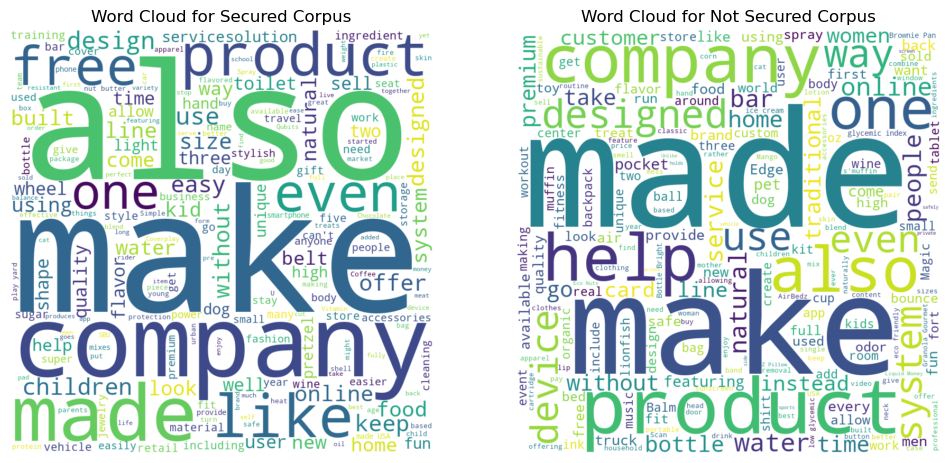

In [1061]:
# Convert Series objects to strings
secured_corpus_text = ' '.join(secured_corpus_no_stop)
not_secured_corpus_text = ' '.join(not_secured_corpus_no_stop)

# Generate word cloud for the secured corpus
secured_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words).generate(secured_corpus_text)

# Generate word cloud for the not secured corpus
not_secured_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words).generate(not_secured_corpus_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(secured_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Secured Corpus')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(not_secured_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Not Secured Corpus')
plt.axis('off')

plt.show()